<a href="https://colab.research.google.com/github/SHAHMACP/Applications-of-Differential-Equations-/blob/main/Stability_Analysis_of_a_2D_differential_system_%2B_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def analyze_phase_portrait(f1_expr, f2_expr, x_range=(-3, 3), y_range=(-3, 3), density=1.2):
    """
    Analyze and visualize the phase portrait of a 2D differential system
    and export results to a timestamped CSV file.

    System:
        dx/dt = f1_expr(x, y)
        dy/dt = f2_expr(x, y)
    """

    x, y = sp.symbols('x y')

    # Step 1: Find equilibrium points
    eq_points = sp.solve([f1_expr, f2_expr], (x, y), dict=True)

    if not eq_points:
        print("No equilibrium points found. Cannot proceed.")
        return

    print("\nEquilibrium Points:")
    for pt in eq_points:
        print(" ", pt)

    # Step 2: Compute Jacobian
    J = sp.Matrix([f1_expr, f2_expr]).jacobian([x, y])
    print("\nJacobian Matrix:")
    sp.pprint(J)

    # Step 3: Stability Analysis + Data Collection
    results = []
    print("\n Stability Analysis:")

    for pt in eq_points:
        J_sub = J.subs(pt)
        eigs = J_sub.eigenvals()
        eig_values = [complex(ev.evalf()) for ev in eigs.keys()]
        real_parts = [ev.real for ev in eig_values]
        imag_parts = [ev.imag for ev in eig_values]

        # Classify equilibrium
        if real_parts[0] * real_parts[1] < 0:
            stability = "Saddle Point"
        elif all(r < 0 for r in real_parts) and all(i == 0 for i in imag_parts):
            stability = "Stable Node"
        elif all(r > 0 for r in real_parts) and all(i == 0 for i in imag_parts):
            stability = "Unstable Node"
        elif any(i != 0 for i in imag_parts):
            if all(r < 0 for r in real_parts):
                stability = "Stable Spiral"
            elif all(r > 0 for r in real_parts):
                stability = "Unstable Spiral"
            elif all(r == 0 for r in real_parts):
                stability = "Center"
            else:
                stability = "Spiral / Complex Behavior"
        else:
            stability = "Indeterminate"

        print(f"\nAt equilibrium {pt}:")
        for ev in eig_values:
            print(f"  Eigenvalue: {ev}")
        print(f"  → {stability}")

        # Store in CSV records
        results.append({
            "x_eq": float(pt[x]),
            "y_eq": float(pt[y]),
            "eigenvalue_1": eig_values[0],
            "eigenvalue_2": eig_values[1],
            "stability": stability
        })

    # Step 4: Save results to CSV with timestamp
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"phase_analysis_{timestamp}.csv"
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)

    print(f"\n Analysis results saved to:  **{filename}**")

    # Step 5: Plot Phase Portrait
    f = sp.lambdify((x, y), f1_expr, 'numpy')
    g = sp.lambdify((x, y), f2_expr, 'numpy')

    X_vals = np.linspace(x_range[0], x_range[1], 25)
    Y_vals = np.linspace(y_range[0], y_range[1], 25)
    X, Y = np.meshgrid(X_vals, Y_vals)

    U = f(X, Y)
    V = g(X, Y)

    plt.figure(figsize=(7, 7))
    plt.streamplot(X, Y, U, V, density=density)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Phase Portrait")
    plt.grid(True)

    # Highlight equilibria
    for pt in eq_points:
        plt.plot(float(pt[x]), float(pt[y]), 'ro', markersize=8)

    plt.show()


🔹 Plotting system: Saddle Point

Equilibrium Points:
  {x: 0, y: 0}

Jacobian Matrix:
⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (1+0j)
  Eigenvalue: (-1+0j)
  → Saddle Point

 Analysis results saved to:  **phase_analysis_2025-10-28_10-04-10.csv**


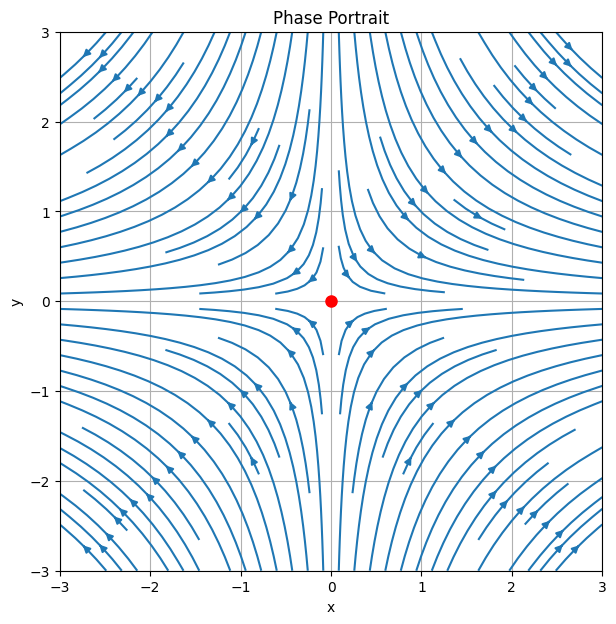

----------------------------------------------------------------------------------------------------

🔹 Plotting system: Stable Node

Equilibrium Points:
  {x: 0, y: 0}

Jacobian Matrix:
⎡-3  0 ⎤
⎢      ⎥
⎣0   -1⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (-3+0j)
  Eigenvalue: (-1+0j)
  → Stable Node

 Analysis results saved to:  **phase_analysis_2025-10-28_10-04-11.csv**


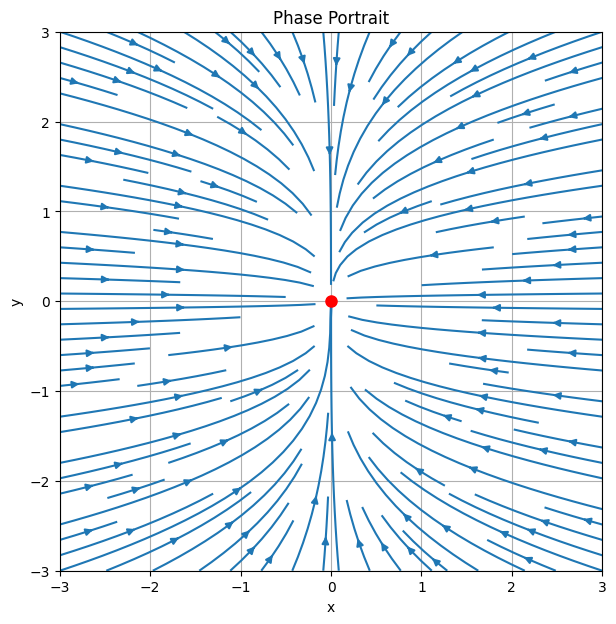

----------------------------------------------------------------------------------------------------

🔹 Plotting system: Unstable Spiral

Equilibrium Points:
  {x: 0, y: 0}

Jacobian Matrix:
⎡1  -1⎤
⎢     ⎥
⎣1  1 ⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (1-1j)
  Eigenvalue: (1+1j)
  → Unstable Spiral

 Analysis results saved to:  **phase_analysis_2025-10-28_10-04-12.csv**


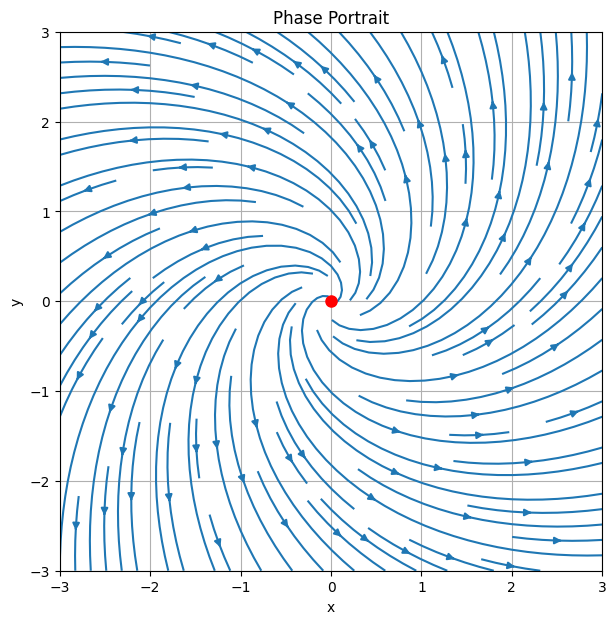

----------------------------------------------------------------------------------------------------

🔹 Plotting system: Center (Harmonic Oscillator)

Equilibrium Points:
  {x: 0, y: 0}

Jacobian Matrix:
⎡0   1⎤
⎢     ⎥
⎣-1  0⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: -1j
  Eigenvalue: 1j
  → Center

 Analysis results saved to:  **phase_analysis_2025-10-28_10-04-12.csv**


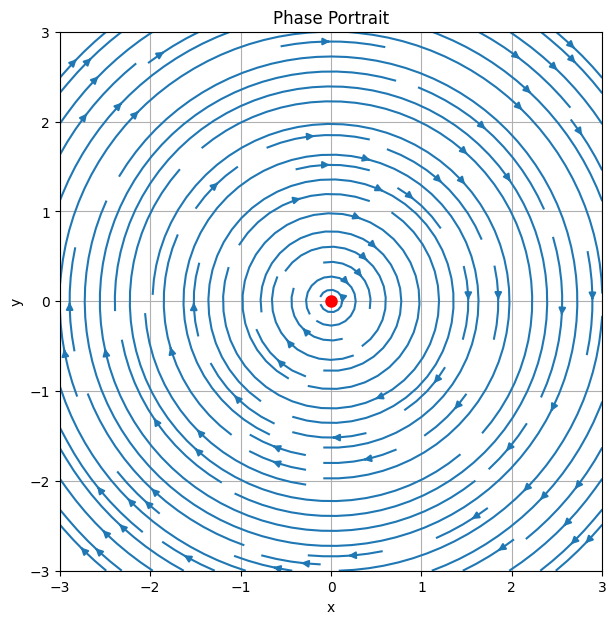

----------------------------------------------------------------------------------------------------

🔹 Plotting system: Van der Pol Oscillator

Equilibrium Points:
  {x: 0, y: 0}

Jacobian Matrix:
⎡    0         1   ⎤
⎢                  ⎥
⎢                 2⎥
⎣-2⋅x⋅y - 1  1 - x ⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (0.5-0.8660254037844386j)
  Eigenvalue: (0.5+0.8660254037844386j)
  → Unstable Spiral

 Analysis results saved to:  **phase_analysis_2025-10-28_10-04-13.csv**


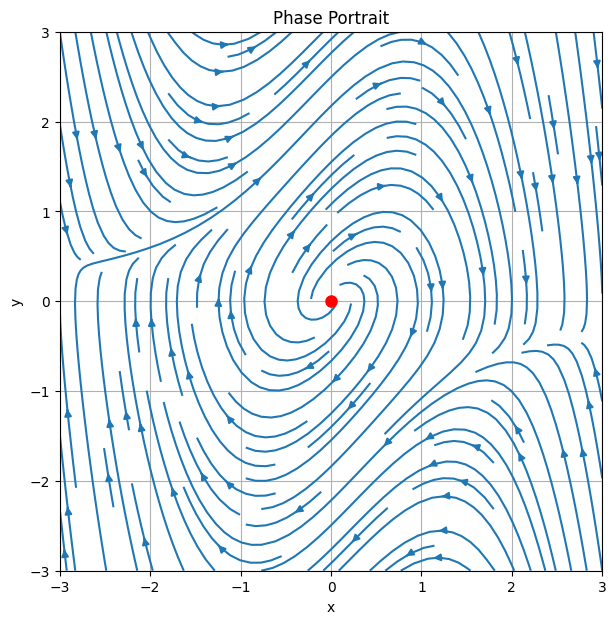

----------------------------------------------------------------------------------------------------

🔹 Plotting system: Lotka-Volterra Predator-Prey

Equilibrium Points:
  {x: 0, y: 0}
  {x: 1, y: 1}

Jacobian Matrix:
⎡1 - y   -x  ⎤
⎢            ⎥
⎣  y    x - 1⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (1+0j)
  Eigenvalue: (-1+0j)
  → Saddle Point

At equilibrium {x: 1, y: 1}:
  Eigenvalue: -1j
  Eigenvalue: 1j
  → Center

 Analysis results saved to:  **phase_analysis_2025-10-28_10-04-14.csv**


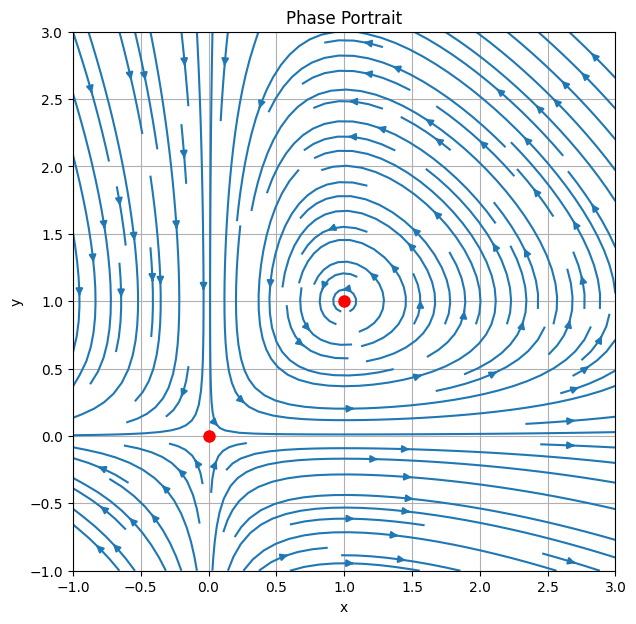

----------------------------------------------------------------------------------------------------


In [ ]:
from sympy import symbols, Eq
import matplotlib.pyplot as plt

# Define symbols globally
x, y = symbols('x y')

# List of differential systems: (System Name, f1, f2, x_range, y_range)
systems = [
    ("Saddle Point",
     x, -y,
     (-3, 3), (-3, 3)),

    ("Stable Node",
     -3*x, -y,
     (-3, 3), (-3, 3)),

    ("Unstable Spiral",
     x - y, x + y,
     (-3, 3), (-3, 3)),

    ("Center (Harmonic Oscillator)",
     y, -x,
     (-3, 3), (-3, 3)),

    ("Van der Pol Oscillator",
     y, (1 - x**2)*y - x,
     (-3, 3), (-3, 3)),

    ("Lotka-Volterra Predator-Prey",
     x*(1-y), y*(x-1),
     (-1, 3), (-1, 3)),
]

# Loop and generate phase portrait for each system
for name, f1, f2, xr, yr in systems:
    print(f"\n🔹 Plotting system: {name}")
    analyze_phase_portrait(
        f1, f2,
        x_range=xr, y_range=yr
    )
    print('-'*100)
